# Part I: Data Preparation

## Read data from csv

#### read data from csv (local)

In [1]:
DATA_DIR = '/Users/Emma/Box Sync/Maryland/Courses/CMSC643 Machine Learning and Data Mining/Code/cmsc643_noshow/data'
CSV_FILE = DATA_DIR + '/KaggleV2-May-2016'

import pandas as pd

# read data using read_csv function
appt_df = pd.read_csv(str(CSV_FILE) + '.csv', dtype = {'PatientId': 'object', 'AppointmentID': 'object'})

## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

#### clean up column names (what do you mean by "clean up column names"?)

In [2]:
# highly recommend that you rename dataset e.g., if you used appt_df = pd.read_csv(...) above first thing to do here is clean_appt_df = appt_df

clean_appt_df = appt_df
clean_appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
clean_appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


#### remove records with erroneous entries

In [4]:
# remove entries with Age < 0
clean_appt_df = clean_appt_df[clean_appt_df['Age'] > 0]

In [5]:
# remove entries with missing values
clean_appt_df = clean_appt_df.dropna(how = 'any')

In [6]:
# remove entries with na values
clean_appt_df = clean_appt_df.dropna(axis = 0)

In [7]:
# count gender values
clean_appt_df.Gender.value_counts()

F    70118
M    36869
Name: Gender, dtype: int64

In [8]:
import numpy as np

# reassign values to gender: Male 0 Female 1
clean_appt_df['Gender'] = np.where(clean_appt_df['Gender'] == "M", 0, 1)

In [9]:
# count gender values
clean_appt_df.Gender.value_counts()

1    70118
0    36869
Name: Gender, dtype: int64

In [10]:
# count No-show values
clean_appt_df['No-show'].value_counts()

No     85307
Yes    21680
Name: No-show, dtype: int64

In [11]:
# reassgin values to no-show: show 1, noshow -1
clean_appt_df['No-show'] = np.where(clean_appt_df['No-show'] == 'No', -1, 1)

In [12]:
# count No-show values
clean_appt_df['No-show'].value_counts()

-1    85307
 1    21680
Name: No-show, dtype: int64

In [13]:
# count Handcap values
clean_appt_df.Handcap.value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [14]:
# remove entries with Handcap value >1 as it should be binary
clean_appt_df = clean_appt_df[clean_appt_df['Handcap'] <= 1]

In [15]:
# count handcap value
clean_appt_df.Handcap.value_counts()

0    104747
1      2041
Name: Handcap, dtype: int64

In [16]:
# take a look at the cleansed data set
clean_appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,-1
1,558997776694438,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,-1
2,4262962299951,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,-1
3,867951213174,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,-1
4,8841186448183,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,-1


In [17]:
# change into categorical variable
for col in ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']:
    clean_appt_df[col] = clean_appt_df[col].astype('category')

In [18]:
clean_appt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106788 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106788 non-null object
AppointmentID     106788 non-null object
Gender            106788 non-null category
ScheduledDay      106788 non-null object
AppointmentDay    106788 non-null object
Age               106788 non-null int64
Neighbourhood     106788 non-null object
Scholarship       106788 non-null category
Hipertension      106788 non-null category
Diabetes          106788 non-null category
Alcoholism        106788 non-null category
Handcap           106788 non-null category
SMS_received      106788 non-null category
No-show           106788 non-null category
dtypes: category(8), int64(1), object(5)
memory usage: 6.5+ MB


In [19]:
# convert time to string
clean_appt_df['ScheduledDay'] = clean_appt_df['ScheduledDay'].astype('str').map(lambda x: x.rstrip('Z').replace('T', ' '))
clean_appt_df['AppointmentDay'] = clean_appt_df['AppointmentDay'].astype('str').map(lambda x: x.rstrip('Z').replace('T', ' '))

In [20]:
# take time interval
clean_appt_df['ScheduledDay'] = pd.to_datetime(clean_appt_df['ScheduledDay'], format='%Y%m%d %H:%M:%S',  errors='raise')
clean_appt_df['AppointmentDay'] = pd.to_datetime(clean_appt_df['AppointmentDay'], format='%Y%m%d %H:%M:%S',  errors='raise')

In [21]:
import datetime as dt

# calculate time difference of AppointmentDay and ScheduledDay in seconds 
clean_appt_df['Tdelta'] = clean_appt_df['AppointmentDay'] - clean_appt_df['ScheduledDay']
clean_appt_df['Seconds'] = clean_appt_df['Tdelta'].dt.total_seconds()

In [22]:
# remove entries with negative time difference
clean_appt_df = clean_appt_df[clean_appt_df['Seconds'] >= 0]

In [23]:
# remove ids
clean_appt_df = clean_appt_df[['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Seconds']]

In [24]:
clean_appt_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Seconds
5,1,76,0,1,0,0,0,0,-1,141789.0
6,1,23,0,0,0,0,0,0,1,118488.0
7,1,39,0,0,0,0,0,0,1,116402.0
9,1,19,0,0,0,0,0,0,-1,126695.0
10,1,30,0,0,0,0,0,0,-1,118909.0


## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

#### create a test set of 20k records

In [25]:
PROCESSED_DATA_DIR = '/Users/Emma/Box Sync/Maryland/Courses/CMSC643 Machine Learning and Data Mining/Code/cmsc643_noshow/processed_data'

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

# use No-show to make sure class proportions are the same for train and test sets
clean_appt_df['No-show'].value_counts() / len(clean_appt_df)

-1    0.714558
 1    0.285442
Name: No-show, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set= train_test_split(clean_appt_df, test_size = 20000 / len(clean_appt_df))

#### make sure class proportions are the same for train and test sets

In [27]:
train_set['No-show'].value_counts() / len(train_set)

-1    0.716392
 1    0.283608
Name: No-show, dtype: float64

In [28]:
test_set['No-show'].value_counts() / len(test_set)

-1    0.71
 1    0.29
Name: No-show, dtype: float64

#### save train and test sets as csv files in the processed_data directory

In [29]:
output_train = PROCESSED_DATA_DIR + '/train.csv'
output_test = PROCESSED_DATA_DIR + '/test.csv'

In [30]:
np.savetxt(output_train, train_set, delimiter=',')
np.savetxt(output_test, test_set, delimiter=',')

## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

#### make copy of train set

In [31]:
clean_appt_df = train_set.copy()

In [32]:
clean_appt_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Seconds
607,1,63,0,0,0,0,0,0,-1,48204.0
107858,1,70,0,0,0,0,0,1,1,3163503.0
56130,1,41,1,0,0,0,0,1,1,2387393.0
80063,1,41,0,1,1,0,0,0,-1,924686.0
4386,0,52,0,0,0,0,0,1,1,298929.0


#### plot the No-show variable against other variables

In [33]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')

def plot_histogram(variable):
    if variable not in list(clean_appt_df.columns.values):
        raise ValueError('variable not found in the data set.')
        
    x = clean_appt_df[clean_appt_df['No-show'] == -1][variable]
    y = clean_appt_df[clean_appt_df['No-show'] == 1][variable]

    plt.hist([x, y], label=['No-show', 'Show'])
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('Histogram of Show and No-show Frequency Count on ' + variable + '\n')
    plt.legend(loc='upper right')

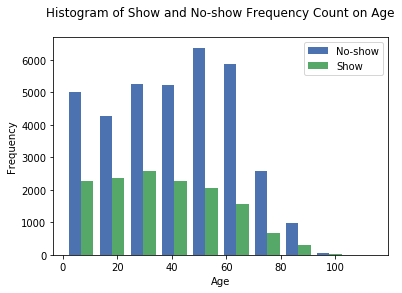

In [34]:
plot_histogram('Age')

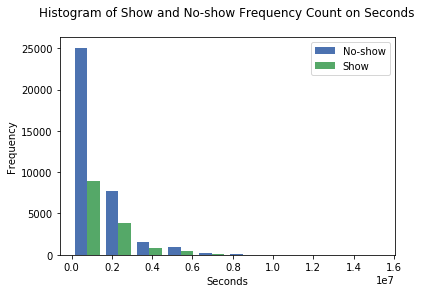

In [35]:
plot_histogram('Seconds')

In [36]:
def plot_histogram_cat(variable):
    if variable not in list(clean_appt_df.columns.values):
        raise ValueError('variable not found in the data set.')
        
    x = clean_appt_df[clean_appt_df['No-show'] == -1][variable]
    y = clean_appt_df[clean_appt_df['No-show'] == 1][variable]

    plt.hist([x, y], bins = 2, label=['No-show', 'Show'])
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    if variable == 'Gender':
        plt.xticks([0.25, 0.75], ('Male', 'Female'))
    else:
        plt.xticks([0.25, 0.75], ('No', 'Yes'))
    plt.title('Histogram of Show and No-show Frequency Count on ' + variable + '\n')
    plt.legend(loc='upper right')

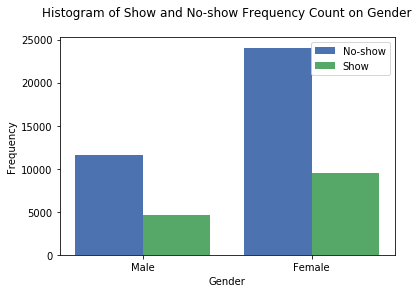

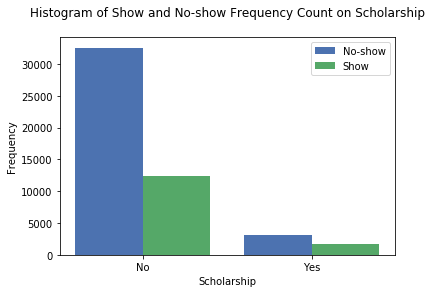

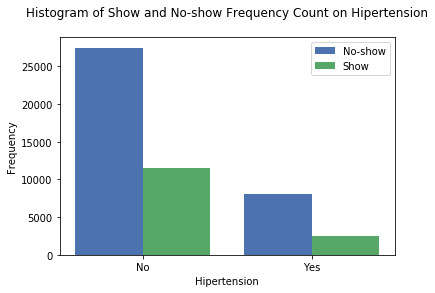

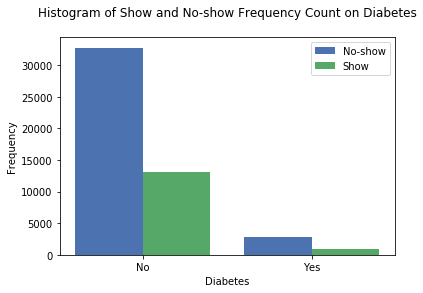

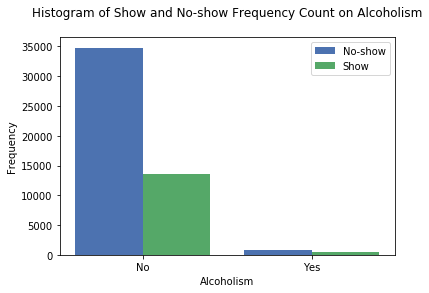

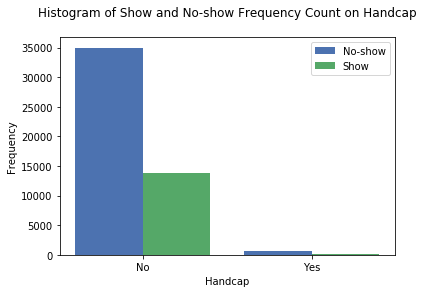

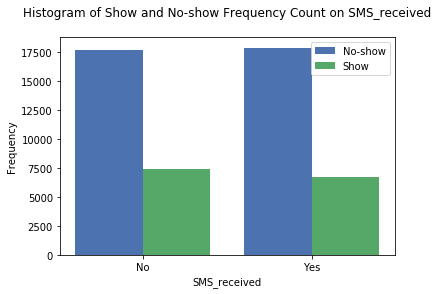

<Figure size 432x288 with 0 Axes>

In [37]:
for col in list(clean_appt_df.columns.values):
    if col in ['Age','No-show', 'Seconds']:
        continue
    plot_histogram_cat(col)
    plt.figure()

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

#### seperate X and y

In [38]:
train_y = clean_appt_df['No-show']
train_X = clean_appt_df[['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Seconds']]

#### create a data pipeline

In [39]:
train_X.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Seconds
607,1,63,0,0,0,0,0,0,48204.0
107858,1,70,0,0,0,0,0,1,3163503.0
56130,1,41,1,0,0,0,0,1,2387393.0
80063,1,41,0,1,1,0,0,0,924686.0
4386,0,52,0,0,0,0,0,1,298929.0


In [40]:
train_y.head()

607      -1
107858    1
56130     1
80063    -1
4386      1
Name: No-show, dtype: category
Categories (2, int64): [-1, 1]

In [41]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn_pandas import DataFrameMapper

cat_attributes = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
num_attributes = [x for x in list(train_X) if x not in cat_attributes]

class NormalizedAttributes(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.age_ix = 0
        self.seconds_ix = 1
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        age_normal = (X[:, self.age_ix] - np.mean(X[:, self.age_ix])) / np.std(X[:, self.age_ix])
        seconds_normal = (X[:, self.seconds_ix] - np.mean(X[:, self.seconds_ix])) / np.std(X[:, self.seconds_ix])
        return np.c_[age_normal, seconds_normal] 
    
class MyNumeric(TransformerMixin):
    
    def __init__(self):
        self.gender_ix = 0
        self.scholarship_ix = 1
        self.hipertension_ix = 2
        self.diabetes_ix = 3
        self.alcoholism_ix = 4
        self.handcap_ix = 5
        self.sms_received_ix = 6

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=0):
        gender_int = X[:, self.gender_ix].astype('int')
        scholarship_int = X[:, self.scholarship_ix].astype('int')
        hipertension_int = X[:, self.hipertension_ix].astype('int')
        diabetes_int = X[:, self.diabetes_ix].astype('int')
        alcoholism_int = X[:, self.alcoholism_ix].astype('int')
        handcap_int = X[:, self.handcap_ix].astype('int')
        sms_received_int = X[:, self.sms_received_ix].astype('int')
        return np.c_[gender_int, scholarship_int, hipertension_int, diabetes_int, alcoholism_int, handcap_int, sms_received_int]
    
class MyLabelBinarizer(TransformerMixin):
    
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
        
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):
        return self.encoder.transform(x)

num_pipeline = Pipeline([
    ('attribs', NormalizedAttributes()) # Standardize numerical variables
])

cat_pipeline = Pipeline([ 
    ('numeric', MyNumeric()), # Transform categorical variables into numeric variables
    ('label_binarizer', MyLabelBinarizer()) 
])

full_pipeline = DataFrameMapper([
    (cat_attributes, cat_pipeline),
    (num_attributes, num_pipeline)
])

In [42]:
train_X.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Seconds
607,1,63,0,0,0,0,0,0,48204.0
107858,1,70,0,0,0,0,0,1,3163503.0
56130,1,41,1,0,0,0,0,1,2387393.0
80063,1,41,0,1,1,0,0,0,924686.0
4386,0,52,0,0,0,0,0,1,298929.0


In [43]:
sorted(full_pipeline.get_params().keys())

['default', 'df_out', 'features', 'input_df', 'sparse']

In [44]:
train_X_clean = full_pipeline.fit_transform(train_X)

In [45]:
train_X_clean.shape

(49706, 9)

In [46]:
train_X_clean.view()

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.05215472, -0.88804517],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.36731056,  1.3198687 ],
       [ 1.        ,  1.        ,  0.        , ...,  1.        ,
         0.0616649 ,  0.76981426],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.64918113, -0.39570283],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -1.01886943,  1.00556281],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.52362453, -0.89515943]])

### Model Building

Using `sklearn` fit:
    - DecisionTree classifier
    - RandomForest classifier
    - Linear SVM classifier
    - SVM with Radial Basis Kernel classifier
    
Use default parameters for now.
Using 10-fold cross validation report both accuracy and AUC for each of the above four models.

QUESTION: Should you use accuracy or AUC for this task as a performance metric?

AUC is a better metric than accuracy for binary classifiers that have a notifion of decision threshold internally.

Accuracy is the proportion of true positives and true negatives in relation to the entire data set (correct classifications). A threshold must be chosen to make a distinction between positive the classification of different groups. In many cases, accuracy is not substantial enough to make a prediction. Meanwhile, AUROC plots the true positve rate (TPR) over the false positive rate (FPR).

However while accuracy aims to reduce both FP and FN and improve both TP and TN, in ROC we can choose to give more importance to one type of error/misclassification over the other.

#### Using sklearn fit DecisionTree classifier

In [47]:
# build your models here
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()
model.fit(train_X_clean, train_y)

tree_accuracy = cross_val_score(model, train_X_clean, train_y, 
                                scoring="accuracy", cv=10)
tree_auc = cross_val_score(model, train_X_clean, train_y, 
                           scoring="roc_auc", cv=10)

#fit model using training data
print("Model")
print(model)
print("Accuracy:")
print(tree_accuracy)
print("AUC:")
print(tree_auc)

Model
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Accuracy:
[0.62301348 0.61899014 0.61174814 0.61677731 0.61335747 0.61637497
 0.62542748 0.61770624 0.61227364 0.61521433]
AUC:
[0.53791578 0.54694295 0.52016268 0.53173505 0.53244905 0.52312602
 0.54060508 0.53520634 0.52728379 0.53499264]


#### Using sklearn fit RandomForest classifier

In [48]:
rand_forest = RandomForestClassifier(n_estimators=100)
model = rand_forest.fit(train_X_clean, train_y.values.ravel())

rnd_clf_accuracy = cross_val_score(rand_forest, train_X_clean, train_y, 
                                   scoring="accuracy", cv=10)
rnd_clf_auc = cross_val_score(rand_forest, train_X_clean, train_y, 
                              scoring="roc_auc", cv=10)

print("Model")
print(model)
print("Accuracy:")
print(rnd_clf_accuracy)
print("AUC:")
print(rnd_clf_auc)

Model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy:
[0.65178033 0.65359083 0.65037216 0.64071615 0.64473949 0.64212432
 0.665862   0.64144869 0.65251509 0.64741397]
AUC:
[0.56735268 0.57351758 0.55663422 0.55767495 0.54848118 0.5537135
 0.57541879 0.55364479 0.564446   0.56118422]


#### Using sklearn fit Linear SVM classifier

In [49]:
lin_svm = SVC(kernel = 'linear')
lin_svm.fit(train_X_clean, train_y)

lin_svm_accuracy = cross_val_score(lin_svm, train_X_clean, train_y, 
                                   scoring="accuracy", cv=10)
lin_svm_auc = cross_val_score(lin_svm, train_X_clean, train_y, 
                              scoring="roc_auc", cv=10)

print("Model")
print(model)
print("Accuracy:")
print(lin_svm_accuracy)
print("AUC:")
print(lin_svm_auc)

Model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy:
[0.71635486 0.71635486 0.71635486 0.71635486 0.71635486 0.71635486
 0.71635486 0.71649899 0.71649899 0.71644194]
AUC:
[0.45205805 0.54619827 0.48596677 0.51333975 0.45376827 0.53468884
 0.44825931 0.43257879 0.50635552 0.54436129]


#### Using sklearn fit SVM with Radial Basis Kernel classifier

In [50]:
lin_svm_rbf = SVC(kernel = "rbf")
lin_svm_rbf.fit(train_X_clean, train_y)

lin_svm_rbf_accuracy = cross_val_score(lin_svm_rbf, train_X_clean, train_y, 
                                       scoring="accuracy", cv=10)
lin_svm_rbf_auc = cross_val_score(lin_svm_rbf, train_X_clean, train_y, 
                                  scoring="roc_auc", cv=10)

print("Model")
print(model)
print("Accuracy:")
print(lin_svm_rbf_accuracy)
print("AUC:")
print(lin_svm_rbf_auc)

Model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy:
[0.71635486 0.71635486 0.71635486 0.71635486 0.71635486 0.71635486
 0.71635486 0.71649899 0.71649899 0.71644194]
AUC:
[0.50458693 0.54967307 0.48130595 0.52858648 0.49275126 0.53087885
 0.51501879 0.50956711 0.51549622 0.53655613]


#### Should you use accuracy or AUC as a metric for this task?
### My thoughts:
#### 1. roc_auc stands for area under the curve based on receiver operating characteristics. 
#### 2. Accuracy ignores probability estimations of classification in favor of class labels, and ROC curves show the trade off between false positive and true positive rates. Therefore AUC of ROC is a better measure than accuracy for comparing learning algorithms.

### Model Tuning

Based on the above, choose two methods and fit a tuned model:
    - use 5-fold cross validation for model selection
    - use 10-fold cross validation for model assessment (based on appropriate performance metric)

Report estimated performance for both tuned classifiers

#### Use 5-fold cross validation for model selection with RandomForest classifier

In [51]:
rand_forest.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": [3, 10, 15, 30],
          "max_features": [1, 3, 6, 9],
          "min_samples_split": [1, 3, 6, 9],
          "min_samples_leaf": [1, 3, 6, 9],
          "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(estimator = rand_forest, param_grid = params, 
                           scoring = "roc_auc", cv = 5)
grid_search.fit(train_X_clean, train_y)

print("Random_Forest: ", grid_search.best_params_)
print("AUC score is {}".format(grid_search.best_score_))

#### Random Forest model assessment with 10-fold based on AUC

In [ ]:
from sklearn.model_selection import cross_val_score

scores_RF = cross_val_score(RandomForestClassifier(n_estimators = 100, 
                                                   max_depth = 10, 
                                                   max_features = 3, 
                                                   min_samples_split = 6,
                                                   min_samples_leaf = 1,
                                                   criterion = "gini",
                                                   verbose = 1), 
                            train_X_clean, train_y, cv = 10, scoring = 'roc_auc')

In [ ]:
print("Mean of RF Scores:", np.mean(scores_RF))

#### Use 5-fold cross validation for model selection with SVM with Radial Basis Kernel classifier

In [ ]:
lin_svm_rbf.get_params().keys()

In [ ]:
vals = [0.0001, 0.01, 0.1, 1, 10]

param_grid = {'C': vals}

SVM_gs = GridSearchCV(estimator = lin_svm_rbf, param_grid = param_grid, 
                      scoring = "roc_auc", cv = 5)
SVM_gs.fit(train_X_clean, train_y)

print("SVM with Radial Basis Kernal: ", SVM_gs.best_params_)
print("AUC score is {}".format(SVM_gs.best_score_))

#### SVM with Radial Basis Kernel model assessment with 10-fold based on AUC

In [ ]:
scores_linsvm = cross_val_score(SVC(kernel = "rbf", C = 10, verbose = 1), 
                                train_X_clean, train_y, cv = 10, scoring = 'roc_auc')

In [ ]:
print("Mean of SVM Scores:", np.mean(scores_linsvm))

#### Report estimated performance for the tuned classifiers.

### Reports:
#### 1. Estimated performance for random forest
#### 2. Estimated performance for linear svm with radial basis kernel 

### Linear SVM with Gradient Descent

In [ ]:
import numpy as np
import math

def _initialize_parameters(nfeatures):
    w = np.random.randn(nfeatures) / math.sqrt(nfeatures)
    # initialize w as unit column vector?
    # No, because it doesn't affect the margin maximization problem.
    # why its norm can represent penalty?
    # the distance of margin 1 is defined as 1/norm
    b = np.random.randn(1) / math.sqrt(nfeatures)
    return w, b

pos_part = np.vectorize(lambda u: u if u > 0. else 0.)

def _get_objective(f, y, w, lam):
    nobs = y.shape[0]
    hinge_loss = np.sum(pos_part(1.0 - y * f)) / nobs 
    # hinge loss given signed vertical distance
    # given sign and absolute value, bad distance goes to hinge loss
    penalty = 0.5 * lam * np.dot(w,w)  # control model complexity
    return hinge_loss + penalty

def _get_signed_distances(X, w, b):
    f = np.dot(X,w) + b 
    return f # f is a nobs by 1 vector

t_part = np.vectorize(lambda r: 1. if r > 0. else 0.)

def _get_gradients(f, X, y, w, b, lam):
    nobs, nfeatures = X.shape
    t = t_part(1. - y * f)
    gw = - np.dot(np.transpose(X), t * y) / nobs + lam * w 
    # only adjust when misclassified. 
    # How the impact of misclassified ones are demonstrated?
    # Only in Perceptron algorithm can it be graphed.
    gb = - np.sum(t * y) / nobs
    return gw, gb

def fit_svm(X, y, lam, n_iter = 100, tol = 1e-10, eta = .4):
    nobs, nfeatures = X.shape
    
    w, b = _initialize_parameters(nfeatures)
    
    prev_obj = 0
    for k in range(n_iter):
        f = _get_signed_distances(X, w, b) 
        
        if k % round(n_iter/10) == 0:
            obj = _get_objective(f, y, w, lam)
            if k > 0 and abs(obj - prev_obj) < tol:
                break
            prev_obj = obj
            eta = eta / 2.0 # decaying learning rate
            print("iteration: %d, obj %.2f" % (k, obj))
        
        gw, gb = _get_gradients(f, X, y, w, b, lam)
        w = w - eta * gw
        b = b - eta * gb
        
    return w, b

In [ ]:
w,b = fit_svm(train_X_clean, train_y.as_matrix(), n_iter = 100, lam = 1)

In [ ]:
fitted_value = np.rint(np.dot(train_X_clean, w) + b)

score_SVM_gd = cross_val_score()
post_part = np.vectorize(lambda u: 1 if u == 0 else 0)
print(np.sum(post_part(fitted_value - train_y.as_matrix())) / train_y.shape[0])

#### How did its performance compare to the above?
### My thoughts
#### 1.
#### 2.

# Part III: Ensembles and Final Result

## AdaBoost

Train an AdaBoost classifier and compare its performance to results obtained in Part II using 10 fold CV.

#### Train an AdaBoost classifier

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

abc_model = abc.fit(train_X_clean, train_y)

#### Compare its performance to results obtained in Part II using 10 fold CV

In [ ]:
scores_abc = cross_val_score(abc_model, train_X_clean, train_y, cv = 10, scoring = 'roc_auc')

print("Mean of AdaBoost Scores:", np.mean(scores_abc))

### My thoughts:
#### 1. The performance of AdaBoost classifier is better compared with the results 

## xgBoost

Train an xgBoost classifier and compare its performance to results in Part II using 10 fold CV. `sklearn` has a gradient boosting model included http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html which you can use. The `xgboost` package https://xgboost.readthedocs.io/en/latest/python/python_intro.htmlhas a wrapper you can use with sklearn as well https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn. The latter is more efficient at training time.

#### Train an xgBoost classifier

In [ ]:
from xgboost import XGBClassifier

xgbc_model = XGBClassifier()
xgbc_model.fit(train_X_clean, train_y.as_matrix())

#### Compare its performance to results obtained in Part II using 10 fold CV

In [ ]:
scores_xgbc = cross_val_score(xgbc_model, train_X_clean, train_y.as_matrix(), cv = 10, scoring = 'roc_auc')

print("Mean of xbBoost Scores:", np.mean(scores_xgbc))

### My thoughts:
#### 1. The performance of xgBoost classifier is better compared with the results 

## Stacking

Choose a set of 5 or so classifiers. Write a function that trains an ensemble using stacking

In [ ]:
def build_stack_ensemble(X, y):
    
    # create train/validation sets using StratifiedShuffleSplit
    from sklearn.model_selection import StratifiedShuffleSplit
    
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
    
    #combine X and y together before splitting???
    for train_index, test_index in split.split(X):
        train_set = X.loc[train_index]
        test_set = X.loc[test_index]
    
    train_set["income_cat"].value_counts() / len(train_set)
    test_set["income_cat"].value_counts() / len(test_set)
    
    # train classifiers in ensemble using train set
    
    # create new feature matrix for validation
    # set by getting predictions from the ensemble
    # classifiers
    
    # train logistic regression classifier on
    # new feature matrix
    
    # return all trained classifiers
    return None

Use 10-fold cross validation to measure performance of your stacked classifier. See Part II solution to see how to roll your own sklearn classifier along with http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator

## Final Result

Choose a single model based on all previous project steps. Train this model on the complete training dataset and measure it's performance on the held out test set.

Compare to the 10-fold CV estimate you got previously.

#### Perform data preprocessing on test set

In [ ]:
clean_appt_df = test_set.copy()

test_y = clean_appt_df['No-show']
test_X = clean_appt_df[['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Seconds']]

test_X_clean = full_pipeline.fit_transform(test_X)

#### Train a model on the complete training dataset

In [ ]:
train_X_clean
train_y

#### Measure the model's performance on the held out test set (AUC, accuracy, confusion matrix)

#### Compare to the 10-fold CV estimate you got previously